In [1]:
import pandas as pd 
import numpy as np
import talib
import seaborn as sns

In [2]:
dt = pd.read_csv('../data/usdbtc.csv')

In [4]:
dt.drop(dt.columns[0], axis=1, inplace=True)

In [5]:
dt.head(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1415318400,349.99,349.99,349.99,349.99,0.015944,5.580122,349.990000
1,1415320200,349.25,349.25,349.24,349.24,0.416000,145.284094,349.240384
2,1415322000,347.77,347.77,347.77,347.77,0.016044,5.579778,347.770000
3,1415323800,347.01,347.01,347.01,347.01,1.315580,456.519322,347.010000
4,1415325600,347.94,347.94,347.94,347.94,0.016035,5.579343,347.940000


volatility =    Average True Range (ATR)

trend =         Moving Average Convergence/Divergence (MACD),
                Average Directional Movement Index (ADX)

momentum =      Relative Strength Index (RSI),
                Balance Of Power (BOP)

volume =        Money Flow Index (MFI),
                Chaikin A/D Oscillator (ADOSC),
                Chaikin A/D Line (AD),
                On Balance Volume (OBV)

In [6]:
dt['atr'] = talib.ATR(dt['High'], dt['Low'], dt['Close'], timeperiod=100)
dt['macd'] = talib.MACD(dt['Close'], fastperiod=50, slowperiod=100, signalperiod=40)[0]
dt['adx'] = talib.ADX(dt['High'], dt['Low'], dt['Close'], timeperiod=50)
dt['rsi'] = talib.RSI(dt['Close'], timeperiod=30)
dt['bop'] = talib.BOP(dt['Open'], dt['High'], dt['Low'], dt['Close'])
dt['mfi'] = talib.MFI(dt['High'], dt['Low'], dt['Close'], dt['Volume_(Currency)'])
dt['adosc'] = talib.ADOSC(dt['High'], dt['Low'], dt['Close'], dt['Volume_(Currency)'])
dt['ad'] = talib.AD(dt['High'], dt['Low'], dt['Close'], dt['Volume_(Currency)'])
dt['obv'] = talib.OBV(dt['Close'], dt['Volume_(Currency)'])

In [7]:
for i in range(len(dt)+1):
    large = 250
    large1 = 48 #1d = 48 30m bars
    large2 = 240 #5d = 240 30m bars
    large3 = 480 #10d = 480 30m bars
    large4 = 960 #20d = 960 30m bars
    dt['prev_1d_slope'] = round( ((dt['Close'] - dt['Close'].shift(large1)) / large1) ,3)
    dt['prev_5d_slope'] = round( ((dt['Close'] - dt['Close'].shift(large2)) / large2) ,3)
    dt['prev_10d_slope'] = round( ((dt['Close'] - dt['Close'].shift(large3)) / large3) ,3)
    dt['prev_20d_slope'] = round( ((dt['Close'] - dt['Close'].shift(large4)) / large4) ,3)
    dt['target'] = round( ((dt['Close'].shift(large * -1) - dt['Close']) / large) ,3)

In [8]:
dt['mfi2'] = dt['mfi']
dt['adx2'] = dt['adx']
dt['rsi2'] = dt['rsi']
i = 0
while(i < len(dt)):
    if(dt['prev_10d_slope'][i] >= 0):
        dt['mfi2'][i] = dt['mfi'][i]
        dt['adx2'][i] = dt['adx'][i]
        dt['rsi2'][i] = dt['rsi'][i]
    else:
        dt['mfi2'][i] = ((dt['mfi'][i]) * -1)
        dt['adx2'][i] = ((dt['adx'][i]) * -1)
        dt['rsi2'][i] = ((dt['rsi'][i]) * -1)
    i += 1

#changing the sign according to the slope of the trend

/home/user/miniconda3/envs/sklearn/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/user/miniconda3/envs/sklearn/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/user/miniconda3/envs/sklearn/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [9]:
dt.iloc[3000:3020]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,atr,macd,...,ad,obv,prev_1d_slope,prev_5d_slope,prev_10d_slope,prev_20d_slope,target,mfi2,adx2,rsi2
3000,1421107200,267.10,267.37,267.10,267.19,3.862525,1031.958849,267.172066,1.294331,-2.031584,...,-553291.455014,-75765.189124,0.018,-0.156,-0.100,-0.046,-0.285,-80.700756,-12.154090,-42.971739
3001,1421109000,266.91,266.91,266.91,266.91,0.152000,40.570320,266.910000,1.284188,-2.057270,...,-553291.455014,-75805.759444,0.002,-0.145,-0.103,-0.047,-0.284,-80.690641,-12.219300,-42.482378
3002,1421110800,261.13,261.13,260.44,260.51,235.053544,61351.528082,261.010862,1.336046,-2.204111,...,-602194.846963,-137157.287526,-0.138,-0.167,-0.115,-0.053,-0.258,-25.709752,-12.488977,-33.469865
3003,1421112600,254.44,255.13,253.13,253.13,152.498326,38781.249336,254.306065,1.396486,-2.483960,...,-640976.096299,-175938.536862,-0.281,-0.189,-0.131,-0.061,-0.227,-0.745889,-12.936009,-26.710340
3004,1421114400,255.99,255.99,255.61,255.63,6.227622,1592.340248,255.689942,1.411121,-2.697048,...,-642400.821784,-174346.196614,-0.233,-0.181,-0.126,-0.056,-0.240,-2.200499,-13.334864,-31.554453
3005,1421116200,255.24,255.30,255.24,255.30,1.153109,294.335324,255.253669,1.400910,-2.902037,...,-642106.486461,-174640.531938,-0.292,-0.186,-0.128,-0.059,-0.236,-1.898027,-13.734261,-31.272208
3006,1421118000,254.06,254.06,253.95,253.95,6.146610,1561.060702,253.970987,1.400400,-3.119043,...,-643667.547163,-176201.592640,-0.343,-0.192,-0.133,-0.060,-0.236,-1.710190,-14.155125,-30.131611
3007,1421119800,248.98,249.00,247.86,247.99,58.093226,14409.530655,248.041498,1.447296,-3.436693,...,-654790.693633,-190611.123295,-0.456,-0.229,-0.141,-0.066,-0.207,-1.518665,-14.692986,-25.829129
3008,1421121600,244.92,245.00,244.89,244.89,48.587408,11900.318367,244.925975,1.463824,-3.793357,...,-666691.012000,-202511.441662,-0.542,-0.235,-0.147,-0.069,-0.145,-1.394527,-15.273925,-23.986246
3009,1421123400,243.04,243.04,243.04,243.04,1.185657,288.162000,243.040000,1.467685,-4.162218,...,-666691.012000,-202799.603661,-0.599,-0.243,-0.150,-0.072,-0.132,-1.349567,-15.874980,-22.974287


In [10]:
for i in range(len(dt)+1):
    dt['mfi3'] = round( ((dt['mfi2'].shift(10) + dt['mfi2'].shift(8) + dt['mfi2'].shift(6) + dt['mfi2'].shift(4) + dt['mfi2'].shift(2) + dt['mfi2']) / 5) ,1)


<AxesSubplot:>

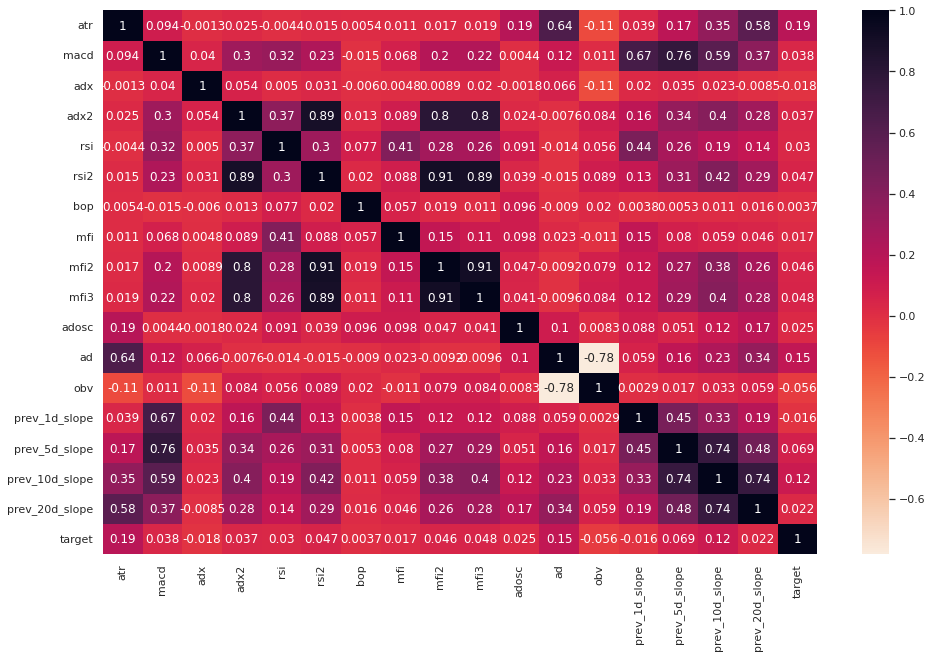

In [11]:
correlation_mat = dt[['atr', 'macd', 'adx', 'adx2', 'rsi', 'rsi2', 'bop', 'mfi', 'mfi2', 'mfi3', 'adosc', 'ad', 'obv', 'prev_1d_slope', 'prev_5d_slope', 'prev_10d_slope', 'prev_20d_slope', 'target']].dropna().corr()
sns.set(rc = {'figure.figsize':(16,10)})
sns.heatmap(correlation_mat, annot = True, cmap='rocket_r')

the target is a vector which represent the price movement for the next days

In [12]:
dt.isnull().sum()

Timestamp              0
Open                   0
High                   0
Low                    0
Close                  0
Volume_(BTC)           0
Volume_(Currency)      0
Weighted_Price         0
atr                  100
macd                 138
adx                   99
rsi                   30
bop                    0
mfi                   14
adosc                  9
ad                     0
obv                    0
prev_1d_slope         48
prev_5d_slope        240
prev_10d_slope       480
prev_20d_slope       960
target               250
mfi2                  14
adx2                  99
rsi2                  30
mfi3                  24
dtype: int64

In [13]:
dt = dt.dropna()

In [14]:
dt.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price', 'atr', 'macd', 'adx', 'rsi',
       'bop', 'mfi', 'adosc', 'ad', 'obv', 'prev_1d_slope', 'prev_5d_slope',
       'prev_10d_slope', 'prev_20d_slope', 'target', 'mfi2', 'adx2', 'rsi2',
       'mfi3'],
      dtype='object')

In [15]:
dt = dt[['Timestamp', 'Open', 'atr', 'ad', 'prev_10d_slope', 'prev_5d_slope', 'obv', 'rsi2', 'mfi2', 'macd', 'target']]

In [25]:
columns = ['Timestamp', 'Open', 'atr', 'prev_10d_slope', 'prev_5d_slope', 'obv', 'rsi2', 'mfi2', 'macd', 'target']
dt[columns] = dt[columns].round(decimals=2)
dt['ad'] = dt['ad'].round(decimals=1)

In [27]:
dt.to_csv('../data/btcdata.csv')